# SHOWTIME

In [1]:
import pandas as pd
import os
import mlflow
import json

In [20]:
playlists_link = {
    "CoryKenshinRandomVideos": "https://www.youtube.com/playlist?list=PLxoHK1S7LhWSU230SAT7fDUsLiXCwaBMo",
    "MusicVideos": "https://youtube.com/playlist?list=PLrhpb4TQr-uKzxOB1C_9x-Ysrj2WRMZN_&si=SiaK1ztgFATZg10B",
    "RandomVideos": "https://youtube.com/playlist?list=PLv3TTBr1W_9tppikBxAE_G6qjWdBljBHJ&si=tcnc1i_SwIo1wgdP", # (3521 Videos, use with caution maybe AWOKWAOKAWOKAW)
}
project_directory = os.getcwd()
os.chdir(project_directory)
os.chdir("..")

In [ ]:
def playlist_download(playlists: dict[str, str]) -> None:
    os.chdir(os.path.join(os.getcwd(), "data"))
    for playlist_title, playlist_link in playlists.items():
        try:
            os.mkdir(f"{playlist_title}Playlist")
        except FileExistsError:
            continue
        os.chdir(os.path.join(os.getcwd(), f"{playlist_title}Playlist"))
        os.system(f"yt-dlp --write-info-json --skip-download --convert-thumbnails jpg --write-thumbnail -o \"%(playlist_index)s.%(ext)s\" {playlist_link}")
        os.chdir("..")

In [ ]:
playlist_download(playlists_link)

[youtube:tab] Extracting URL: https://www.youtube.com/playlist?list=PLxoHK1S7LhWSU230SAT7fDUsLiXCwaBMo
[youtube:tab] PLxoHK1S7LhWSU230SAT7fDUsLiXCwaBMo: Downloading webpage
[youtube:tab] PLxoHK1S7LhWSU230SAT7fDUsLiXCwaBMo: Redownloading playlist API JSON with unavailable videos
[download] Downloading playlist: Random Videos
[youtube:tab] PLxoHK1S7LhWSU230SAT7fDUsLiXCwaBMo page 1: Downloading API JSON
[info] Writing playlist metadata as JSON to: 000.info.json
[info] Downloading playlist thumbnail 3 ...
[info] Writing playlist thumbnail 3 to: 000.jpg
[youtube:tab] Playlist Random Videos: Downloading 186 items of 186
[download] Downloading item 1 of 186
[youtube] Extracting URL: https://www.youtube.com/watch?v=1ZPopZJipnA
[youtube] 1ZPopZJipnA: Downloading webpage
[youtube] 1ZPopZJipnA: Downloading tv client config
[youtube] 1ZPopZJipnA: Downloading player 9fe2e06e-main
[youtube] 1ZPopZJipnA: Downloading tv player API JSON
[youtube] 1ZPopZJipnA: Downloading ios player API JSON
[youtube] 1

ERROR: [youtube] XkkxmfUjAmE: Private video. Sign in if you've been granted access to this video. Use --cookies-from-browser or --cookies for the authentication. See  https://github.com/yt-dlp/yt-dlp/wiki/FAQ#how-do-i-pass-cookies-to-yt-dlp  for how to manually pass cookies. Also see  https://github.com/yt-dlp/yt-dlp/wiki/Extractors#exporting-youtube-cookies  for tips on effectively exporting YouTube cookies


[download] Downloading item 11 of 186
[youtube] Extracting URL: https://www.youtube.com/watch?v=k37KC1JiXn4
[youtube] k37KC1JiXn4: Downloading webpage
[youtube] k37KC1JiXn4: Downloading tv client config
[youtube] k37KC1JiXn4: Downloading tv player API JSON
[youtube] k37KC1JiXn4: Downloading ios player API JSON
[youtube] k37KC1JiXn4: Downloading m3u8 information
[info] k37KC1JiXn4: Downloading 1 format(s): 399+251
[info] Downloading video thumbnail 41 ...
[info] Writing video thumbnail 41 to: 011.webp
[info] Writing video metadata as JSON to: 011.info.json
[ThumbnailsConvertor] Converting thumbnail "011.webp" to jpg
Deleting original file 011.webp (pass -k to keep)
[download] Downloading item 12 of 186
[youtube] Extracting URL: https://www.youtube.com/watch?v=9BXp8suwFqE
[youtube] 9BXp8suwFqE: Downloading webpage
[youtube] 9BXp8suwFqE: Downloading tv client config
[youtube] 9BXp8suwFqE: Downloading tv player API JSON
[youtube] 9BXp8suwFqE: Downloading ios player API JSON
[youtube] 9BXp8

ERROR: [youtube] TWIPtx1-t0k: Private video. Sign in if you've been granted access to this video. Use --cookies-from-browser or --cookies for the authentication. See  https://github.com/yt-dlp/yt-dlp/wiki/FAQ#how-do-i-pass-cookies-to-yt-dlp  for how to manually pass cookies. Also see  https://github.com/yt-dlp/yt-dlp/wiki/Extractors#exporting-youtube-cookies  for tips on effectively exporting YouTube cookies


[download] Downloading item 21 of 186
[youtube] Extracting URL: https://www.youtube.com/watch?v=fvv6yV5wByU
[youtube] fvv6yV5wByU: Downloading webpage
[youtube] fvv6yV5wByU: Downloading tv client config
[youtube] fvv6yV5wByU: Downloading tv player API JSON
[youtube] fvv6yV5wByU: Downloading ios player API JSON
[youtube] fvv6yV5wByU: Downloading m3u8 information
[info] fvv6yV5wByU: Downloading 1 format(s): 299+251
[info] Downloading video thumbnail 41 ...
[info] Writing video thumbnail 41 to: 021.webp
[info] Writing video metadata as JSON to: 021.info.json
[ThumbnailsConvertor] Converting thumbnail "021.webp" to jpg
Deleting original file 021.webp (pass -k to keep)
[download] Downloading item 22 of 186
[youtube] Extracting URL: https://www.youtube.com/watch?v=I2s-xpGteh4
[youtube] I2s-xpGteh4: Downloading webpage
[youtube] I2s-xpGteh4: Downloading tv client config
[youtube] I2s-xpGteh4: Downloading tv player API JSON
[youtube] I2s-xpGteh4: Downloading ios player API JSON
[youtube] I2s-x

ERROR: [youtube] 3QoT3tDxcuo: Private video. Sign in if you've been granted access to this video. Use --cookies-from-browser or --cookies for the authentication. See  https://github.com/yt-dlp/yt-dlp/wiki/FAQ#how-do-i-pass-cookies-to-yt-dlp  for how to manually pass cookies. Also see  https://github.com/yt-dlp/yt-dlp/wiki/Extractors#exporting-youtube-cookies  for tips on effectively exporting YouTube cookies


[youtube] -LKN1ZmUqDg: Downloading tv client config
[youtube] -LKN1ZmUqDg: Downloading tv player API JSON
[youtube] -LKN1ZmUqDg: Downloading ios player API JSON
[download] Downloading item 138 of 186
[youtube] Extracting URL: https://www.youtube.com/watch?v=oiRnc0Gio4I
[youtube] oiRnc0Gio4I: Downloading webpage


ERROR: [youtube] -LKN1ZmUqDg: Private video. Sign in if you've been granted access to this video. Use --cookies-from-browser or --cookies for the authentication. See  https://github.com/yt-dlp/yt-dlp/wiki/FAQ#how-do-i-pass-cookies-to-yt-dlp  for how to manually pass cookies. Also see  https://github.com/yt-dlp/yt-dlp/wiki/Extractors#exporting-youtube-cookies  for tips on effectively exporting YouTube cookies


[youtube] oiRnc0Gio4I: Downloading tv client config
[youtube] oiRnc0Gio4I: Downloading tv player API JSON
[youtube] oiRnc0Gio4I: Downloading ios player API JSON
[youtube] oiRnc0Gio4I: Downloading m3u8 information
[info] oiRnc0Gio4I: Downloading 1 format(s): 248+251
[info] Downloading video thumbnail 41 ...
[info] Writing video thumbnail 41 to: 138.webp
[info] Writing video metadata as JSON to: 138.info.json
[ThumbnailsConvertor] Converting thumbnail "138.webp" to jpg
Deleting original file 138.webp (pass -k to keep)
[download] Downloading item 139 of 186
[youtube] Extracting URL: https://www.youtube.com/watch?v=L2eS8gUCGaE
[youtube] L2eS8gUCGaE: Downloading webpage
[youtube] L2eS8gUCGaE: Downloading tv client config
[youtube] L2eS8gUCGaE: Downloading tv player API JSON
[youtube] L2eS8gUCGaE: Downloading ios player API JSON
[youtube] L2eS8gUCGaE: Downloading m3u8 information
[info] L2eS8gUCGaE: Downloading 1 format(s): 137+251
[info] Downloading video thumbnail 41 ...
[info] Writing vid

ERROR: [youtube] gW_c27nmBW8: Private video. Sign in if you've been granted access to this video. Use --cookies-from-browser or --cookies for the authentication. See  https://github.com/yt-dlp/yt-dlp/wiki/FAQ#how-do-i-pass-cookies-to-yt-dlp  for how to manually pass cookies. Also see  https://github.com/yt-dlp/yt-dlp/wiki/Extractors#exporting-youtube-cookies  for tips on effectively exporting YouTube cookies


[download] Downloading item 180 of 186
[youtube] Extracting URL: https://www.youtube.com/watch?v=VjlP9wLd-bo
[youtube] VjlP9wLd-bo: Downloading webpage
[youtube] VjlP9wLd-bo: Downloading tv client config
[youtube] VjlP9wLd-bo: Downloading tv player API JSON
[youtube] VjlP9wLd-bo: Downloading ios player API JSON
[youtube] VjlP9wLd-bo: Downloading m3u8 information
[info] VjlP9wLd-bo: Downloading 1 format(s): 137+251
[info] Downloading video thumbnail 44 ...
[info] Video Thumbnail 44 does not exist
[info] Downloading video thumbnail 43 ...
[info] Writing video thumbnail 43 to: 180.jpg
[info] Writing video metadata as JSON to: 180.info.json
[ThumbnailsConvertor] Not converting thumbnail "180.jpg"; already is in target format jpg
[download] Downloading item 181 of 186
[youtube] Extracting URL: https://www.youtube.com/watch?v=2gCuUH8pdkw
[youtube] 2gCuUH8pdkw: Downloading webpage
[youtube] 2gCuUH8pdkw: Downloading tv client config
[youtube] 2gCuUH8pdkw: Downloading tv player API JSON
[youtub

[youtube:tab] Extracting URL: https://youtube.com/playlist?list=PLrhpb4TQr-uKzxOB1C_9x-Ysrj2WRMZN_
[youtube:tab] Extracting URL: https://youtube.com/playlist?list=PLv3TTBr1W_9tppikBxAE_G6qjWdBljBHJ
[youtube:tab] PLrhpb4TQr-uKzxOB1C_9x-Ysrj2WRMZN_: Downloading webpage
[youtube:tab] PLv3TTBr1W_9tppikBxAE_G6qjWdBljBHJ: Downloading webpage
[youtube:tab] PLrhpb4TQr-uKzxOB1C_9x-Ysrj2WRMZN_: Redownloading playlist API JSON with unavailable videos
[youtube:tab] PLv3TTBr1W_9tppikBxAE_G6qjWdBljBHJ: Redownloading playlist API JSON with unavailable videos
[download] Downloading playlist: Most random music playlist on youtube!
[download] Downloading playlist: Instant Regret Clicking this Playlist
[youtube:tab] PLrhpb4TQr-uKzxOB1C_9x-Ysrj2WRMZN_ page 1: Downloading API JSON
[youtube:tab] PLv3TTBr1W_9tppikBxAE_G6qjWdBljBHJ page 1: Downloading API JSON
[youtube:tab] PLv3TTBr1W_9tppikBxAE_G6qjWdBljBHJ page 2: Downloading API JSON
[youtube:tab] PLrhpb4TQr-uKzxOB1C_9x-Ysrj2WRMZN_ page 2: Downloading API 

In [7]:
numerical_feature_json_keys = ["comment_count", "view_count", "like_count"]
text_feature_json_keys = ["title", "description", "channel"]
categories_feature_json_keys = ["tags", "categories"]
duration_string_feature_json_key = "duration_string"
playlist_json_file = "000.info.json"

def duration_string_to_seconds(duration_string: str) -> int:
    '''Converts duration strings to seconds'''
    multiplier = 1
    total_seconds = 0
    for digit in duration_string.split(":")[::-1]:
        total_seconds += int(digit) * multiplier
        multiplier *= 60
    return total_seconds

def video_json_to_dictionary(file_path: str) -> dict:
    '''Get specific features from .json file and return as dictionary pair of (name, value)'''
    with open(file_path, 'r') as f:
        result = dict()
        data = json.load(f)
        for key in numerical_feature_json_keys:
            result.update({key: data.get(key, 0)}) # get(key, default_value)
        for key in text_feature_json_keys:
            result.update({key: data.get(key, "")})
        for key in categories_feature_json_keys:
            result.update({key: " ".join(data.get(key, ""))})
        result.update({"duration": duration_string_to_seconds(data[duration_string_feature_json_key])})
    return result

def get_title_from_playlist_json(file_path: str) -> str:
    '''Opens .json info file for playlist, then returns the title'''
    with open(file_path, 'r') as f:
        data = json.load(f)
    return data["title"]

def playlist_to_dataframes() -> dict[str, pd.DataFrame]:
    dataframes = dict()
    for root, dirs, files in os.walk(os.path.join(os.getcwd(), "data")):
        # Removes hidden directories from walk
        dirs[:] = [d for d in dirs if not d[0] == '.']
        # Skips directories with 0 files (this also skips playlist directories)
        if len(files) == 0: continue
        # Init playlist dataframe and title
        playlist_dataframe = pd.DataFrame()
        playlist_title = root.split("/")[::-1][0]       
        # Traverse files in subdirectory (playlist directory)
        for file in files:
            file_path = os.path.join(root, file) # absolute path of the file
            if file == playlist_json_file: # checks and sets playlist info .json
                continue
            elif file.endswith(".json"): # parse video .json
                video_index = [int(file.split(".")[0])]
                playlist_dataframe = pd.concat(
                    [
                        playlist_dataframe, pd.DataFrame(video_json_to_dictionary(file_path)
                        , index=video_index)
                    ]
                    , ignore_index=False # if not ignored, it uses the index of of both dataframes
                )
        # Sorts rows alphabetically (for easier visualisation)
        playlist_dataframe = playlist_dataframe.sort_index()
        dataframes.update({playlist_title: playlist_dataframe})
    return dataframes

In [8]:
shit = playlist_to_dataframes()

In [13]:
cory_kenshin_vids_df = shit['CoryKenshinRandomVideosPlaylist']
music_vids_df = shit['MusicVideosPlaylist']

cory_kenshin_vids_df.head()

,comment_count,view_count,like_count,title,description,channel,tags,categories,duration
1,295000,18269658,903175,Reacting to the Five Nights at Freddy's Movie ...,Trailer: https://www.youtube.com/watch?v=0VH9W...,CoryxKenshin,,Gaming,423
2,100000,3968877,449911,30,this video has no purpose other than for me to...,CoryxKenshin,30 coryxkenshin cory kenshin birthday 2022 rem...,Gaming,475
3,29000,4555684,373542,I Can't Hide This Any Longer,https://coryxkenshin.com GOGOGOGO BEFORE IT SE...,CoryxKenshin,i cant hide this any longer cant hide this any...,Gaming,937
4,130000,10211699,876156,Deleting My YouTube Channel.,Promise broken. Thank you for everything.,CoryxKenshin,deleting my youtube channel coryxkenshin cory ...,Gaming,1159
5,94000,10395453,1181224,YouTube: Racism and Favoritism,Never in a million years did I think I would u...,CoryxKenshin,youtube favoritism and racism coryxkenshin cor...,Gaming,838


In [14]:
music_vids_df.head()

,comment_count,view_count,like_count,title,description,channel,tags,categories,duration
1,4300000,8747214036,54935785,Luis Fonsi - Despacito ft. Daddy Yankee,“Despacito” disponible ya en todas las platafo...,Luis Fonsi,Luis Fonsi Despacito UMLE Latino Latin Pop Lui...,Music,282
2,2300000,6705724926,45163293,Wiz Khalifa - See You Again ft. Charlie Puth [...,Download the new Furious 7 Soundtrack Deluxe V...,Wiz Khalifa,Wiz Khalifa Blacc Hollywood Taylor Gang Atlant...,Music,237
3,1200000,6495394859,34471194,Ed Sheeran - Shape of You (Official Music Video),The official music video for Ed Sheeran - Shap...,Ed Sheeran,Ed Sheeran Shape Of You Ed Sheeran Shape Of Yo...,Music,263
4,435000,4250124954,16686695,Maroon 5 - Sugar (Official Music Video),Buy Sugar on iTunes: http://smarturl.it/M5V\n\...,Maroon 5,maroon sugar maroon she will be loved maroon o...,Music,301
5,524000,4188470389,18553278,OneRepublic - Counting Stars,Stream & Download OneRepublic’s latest album “...,OneRepublic,OneRepublic One Republic 1Republic Counting St...,Music,283


<Axes: xlabel='categories'>

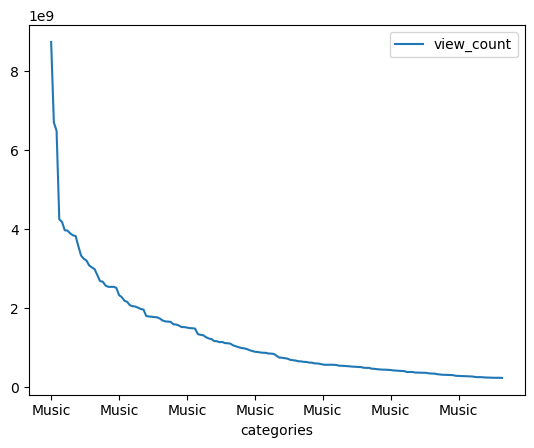

In [176]:
music_vids_df.plot(x="categories", y="view_count")